In [1]:
# import libraries to work with


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##load dataset from csv using the read_csv() method of pandas

dt = pd.read_csv('online_shoppers_intention.csv')

## Understanding the dataset


The data used in this analysis is an Online Shoppers Purchasing Intention data set provided from a top ecommerce site. The data set was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

The primary purpose of the data set is to predict the purchasing intentions of a visitor to this particular store’s website. This dataset has very few missing values and all features of the dataset are relevant to the purchasing intention based on inference.


In [3]:
dt.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
dt.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [5]:
dt.shape

(12330, 18)

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
dt.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [8]:
dt.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## DATA CLEANING

In [9]:
dt.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [10]:
#checking the missing data, from below we can see we dont have any missing data

dt.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [11]:
dt.VisitorType.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

## EXPLORE CORELLATION

In [12]:
dt.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


<AxesSubplot:>

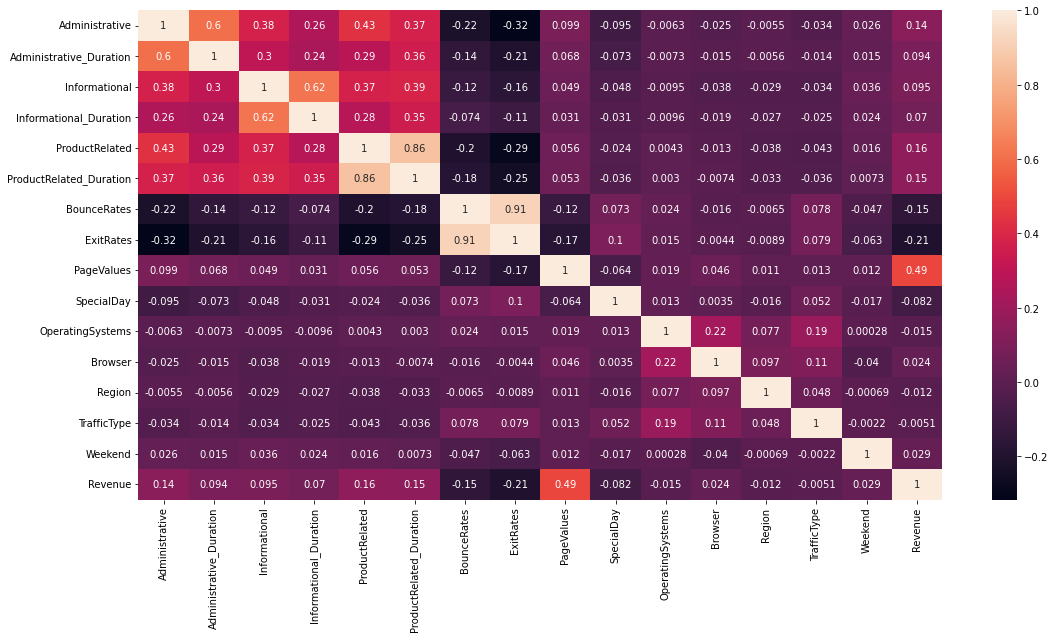

In [13]:
#correlation using heatmap

plt.figure(figsize=(18,9))

sns.heatmap(dt.corr(),annot=True)

Page value has a high impart on the revenue generated

## Uni-variant Analysis

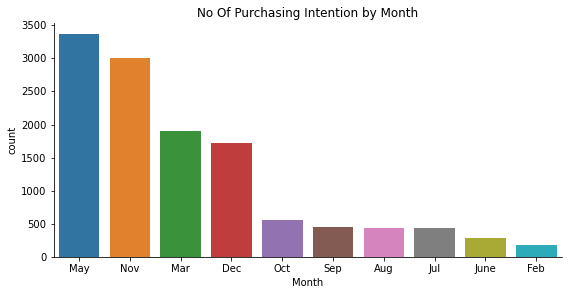

In [14]:
### Month 

sns.catplot(x = "Month", kind="count", data = dt,height=4, aspect=2,order = dt['Month'].value_counts(ascending=False).index ).set(title ='No Of Purchasing Intention by Month')

May has the most online presences

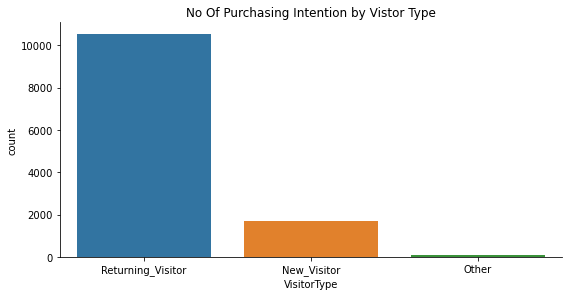

In [15]:
### VisitorType

sns.catplot(x ="VisitorType",kind="count",data=dt,height=4, aspect=2, ).set(title = 'No Of Purchasing Intention by Vistor Type')

More of returning customers visits the online site

In [16]:
## Weekend

dt_wkd = dt.groupby("Weekend")["Weekend"].count()

dt_wkd


Weekend
False    9462
True     2868
Name: Weekend, dtype: int64

Text(0.5, 1.0, 'No Of Purchasing Intention by Weekend')

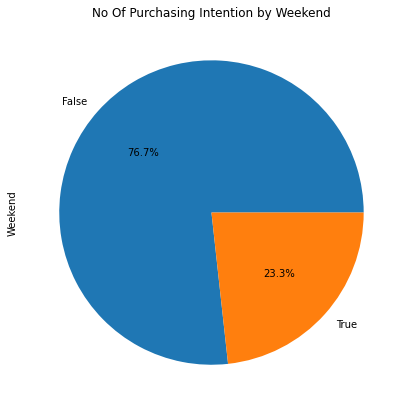

In [17]:
dt_wkd.plot.pie(autopct="%.1f%%",figsize=(7,7)).set_title("No Of Purchasing Intention by Weekend")


Less customers visit the online site during weekends

In [18]:
## Revenue
dt_rev =dt.groupby("Revenue")["Revenue"].count()
dt_rev

Revenue
False    10422
True      1908
Name: Revenue, dtype: int64

Text(0.5, 1.0, 'No Of Purchasing Intention by Revenue')

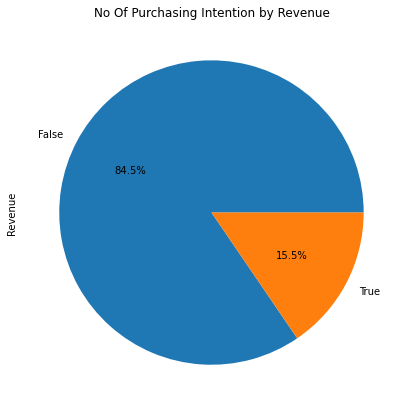

In [19]:
dt_rev.plot.pie(autopct="%.1f%%",figsize=(7,7)).set_title("No Of Purchasing Intention by Revenue")

Majority of the online intention did not yield in purchase to generate high revenue generated

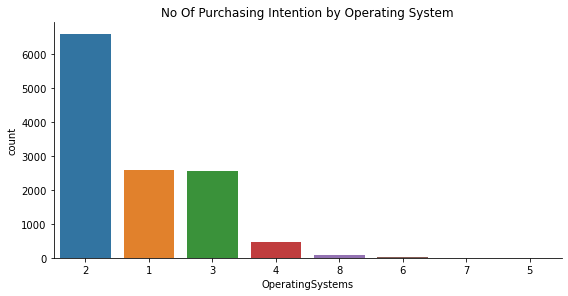

In [20]:
#OperatingSystems

sns.catplot(x = "OperatingSystems", kind="count", data = dt,height=4, aspect=2,order = dt['OperatingSystems'].value_counts(ascending=False).index ).set(title ='No Of Purchasing Intention by Operating System')

Customers with operating system 2 then to visit the site the most

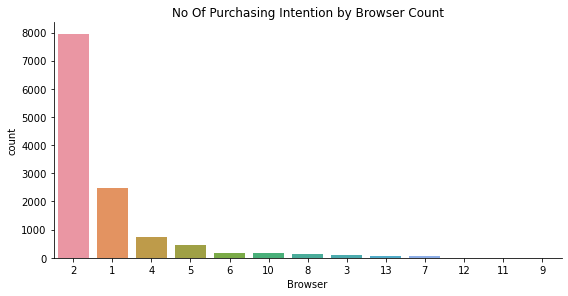

In [21]:
#Browser

sns.catplot(x = "Browser", kind="count", data = dt,height=4, aspect=2,order = dt['Browser'].value_counts(ascending=False).index).set(title='No Of Purchasing Intention by Browser Count')

Browser count for 2 has the highest shoppers intention

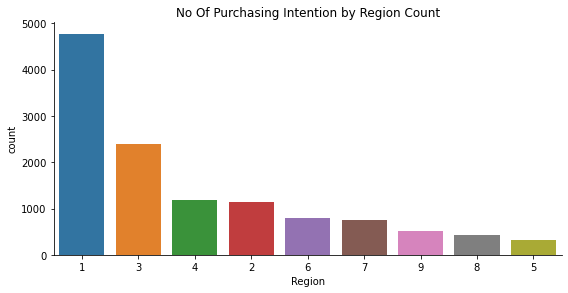

In [22]:
#Region

sns.catplot(x = "Region", kind="count", data = dt,height=4, aspect=2,order = dt['Region'].value_counts(ascending=False).index).set(title='No Of Purchasing Intention by Region Count')

Region 1 has the hight number of customer that visited the shopping site

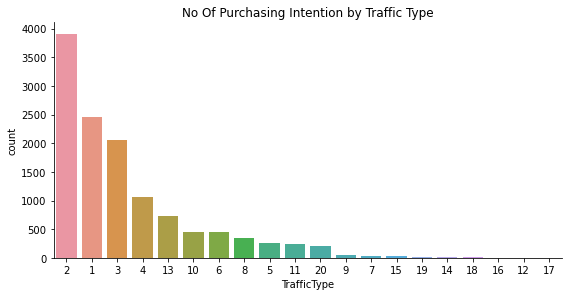

In [23]:
#TrafficType

sns.catplot(x = "TrafficType", kind="count", data = dt,height=4, aspect=2,order = dt['TrafficType'].value_counts(ascending=False).index).set(title ='No Of Purchasing Intention by Traffic Type')

## Bi-variant Analysis

Revenue Indicators For Categorical Features
1. Month
2. Traffic Type
3. Weekend
4. Operating System
5. Browsers
6. Visitors Type
7. ProductRelated

In [24]:
dt.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<Figure size 1080x504 with 0 Axes>

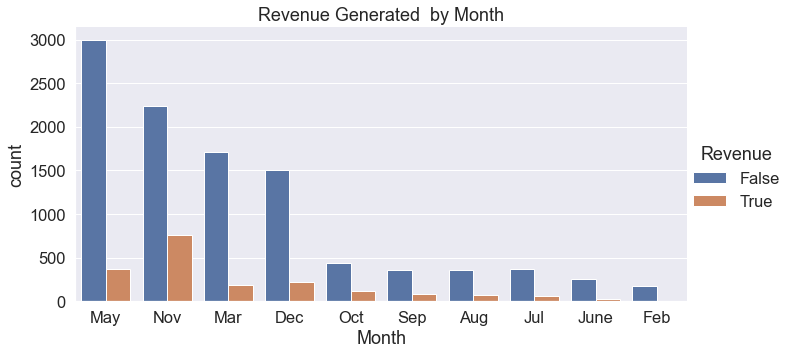

In [25]:
# Revenue Generated by Month

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,7))




sns.catplot(x='Month',data=dt,hue='Revenue',kind='count',aspect=2, order = dt['Month'].value_counts(ascending=False).index).set(title ='Revenue Generated  by Month')

Nov generated the highest revenue for the online site, this might be due to the huge sales that happens this period before the festive period.

<Figure size 1080x504 with 0 Axes>

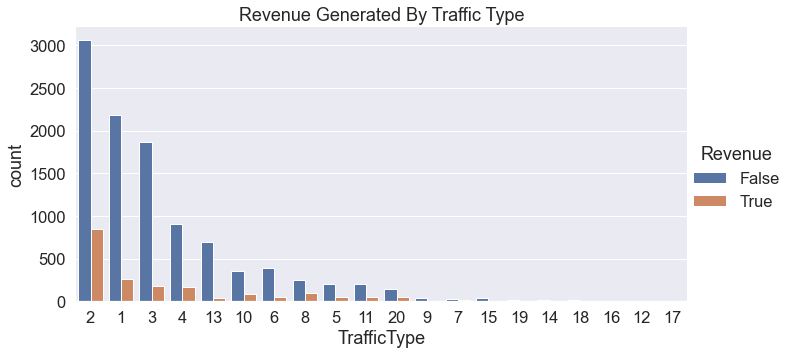

In [26]:
#Revenue Generated By Traffic Type

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,7))

sns.catplot(x='TrafficType',data=dt,hue='Revenue',kind='count',aspect=2, order = dt['TrafficType'].value_counts(ascending=False).index).set(title = 'Revenue Generated By Traffic Type')


<Figure size 1080x504 with 0 Axes>

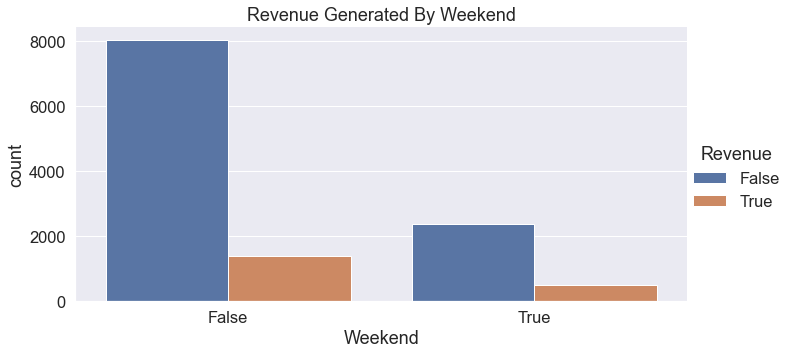

In [27]:
#Revenue Generated By Weekend

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,7))


sns.catplot(x='Weekend',data=dt,hue='Revenue',kind='count',aspect=2).set(title = 'Revenue Generated By Weekend')


<Figure size 1080x504 with 0 Axes>

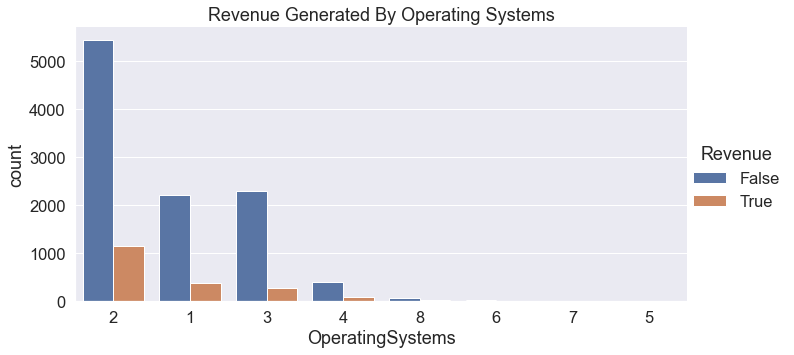

In [28]:
#Revenue Generated By Operating Systems

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,7))


sns.catplot(x='OperatingSystems',data=dt,hue='Revenue',kind='count',aspect=2,order = dt['OperatingSystems'].value_counts(ascending=False).index ).set(title ='Revenue Generated By Operating Systems')


<Figure size 1080x504 with 0 Axes>

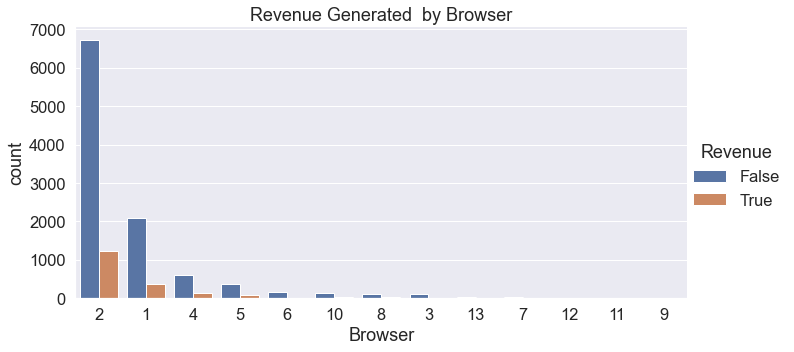

In [29]:
# Revenue Generated by Browser

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,7))



sns.catplot(x='Browser',data=dt,hue='Revenue',kind='count',aspect=2,order = dt['Browser'].value_counts(ascending=False).index ).set(title ='Revenue Generated  by Browser')


<Figure size 1080x504 with 0 Axes>

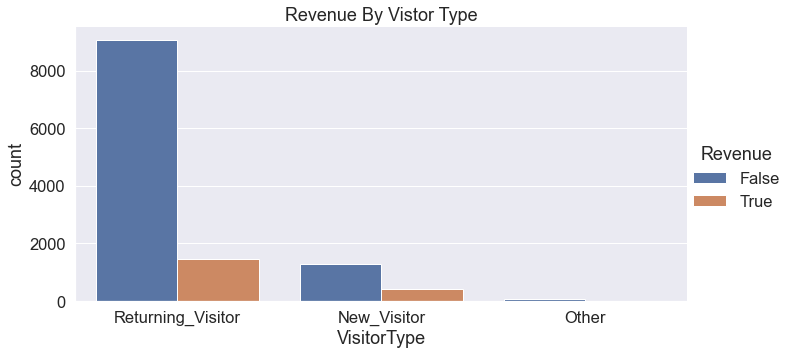

In [30]:
#Revenue By Vistor Type

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,7))


sns.catplot(x='VisitorType',data=dt,hue='Revenue',kind='count',aspect=2).set( title='Revenue By Vistor Type')

<Figure size 1080x504 with 0 Axes>

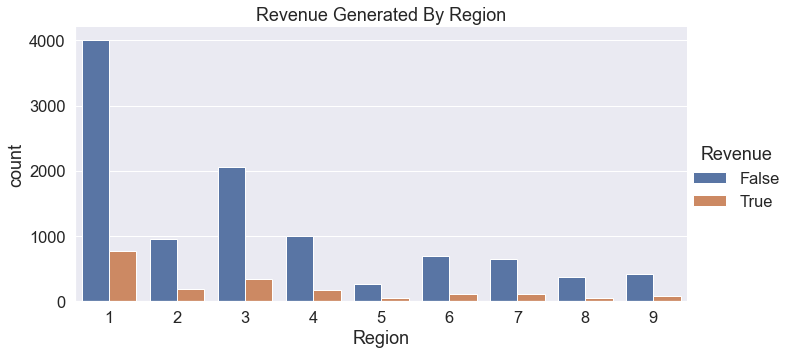

In [31]:
#Revenue Generated By Region

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,7))

sns.catplot(x='Region',data=dt,hue='Revenue',kind='count',aspect=2).set(title = 'Revenue Generated By Region')


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\li

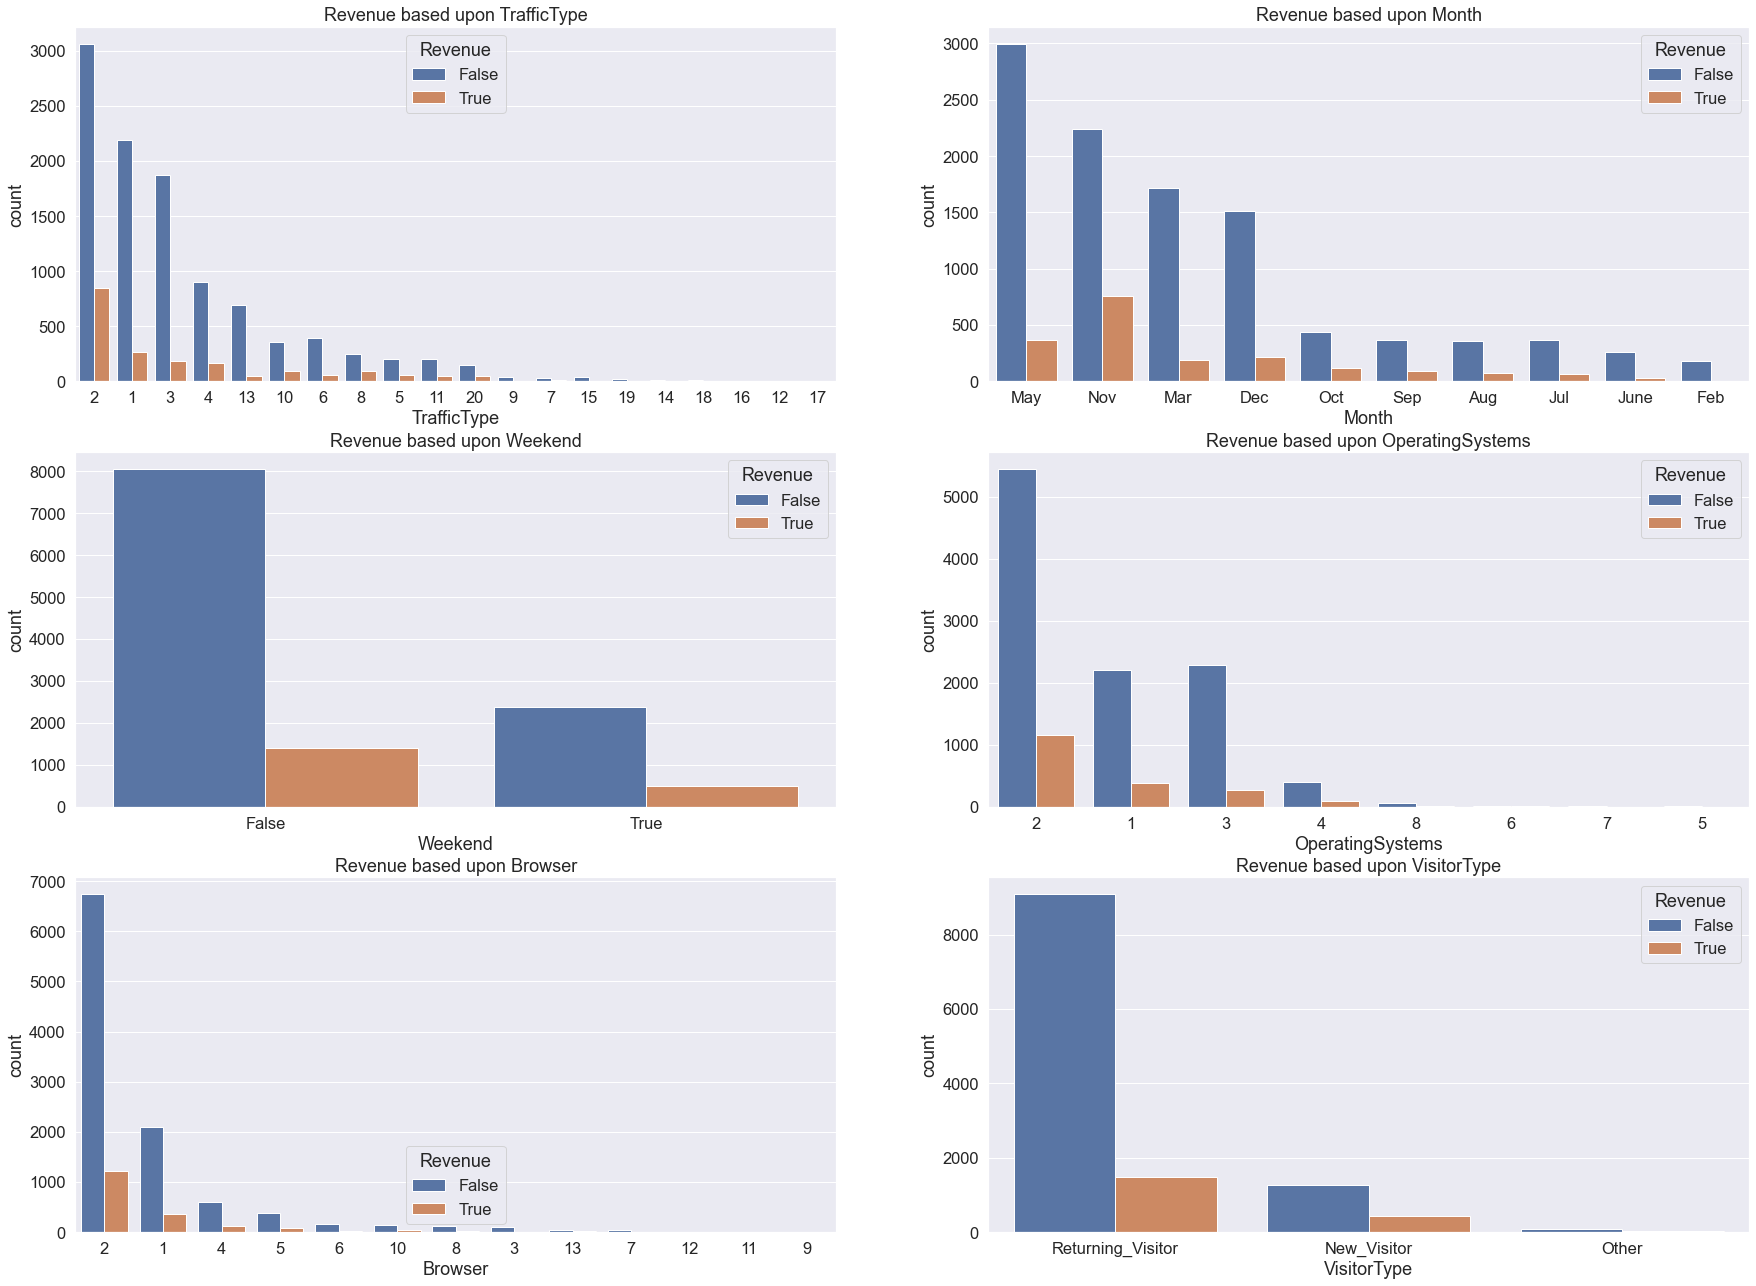

In [32]:
# Month, Traffic Type, Weekend, Operating System,Browsers, Visitors Type, ProductRelated


features =['TrafficType','Month','Weekend','OperatingSystems','Browser','VisitorType']    
plt.figure(figsize=(30,30))
sns.set_theme(font_scale=1.5)

number = 0
for feature in features:
    number = number + 1
    ax = plt.subplot(4, 2, number,adjustable='datalim')
    sns.countplot(dt[feature],hue=dt['Revenue'],
                  order = dt[feature].value_counts(ascending=False).index)
    ax.set_title('Revenue based upon'+ " " + feature)

## Bi-variant Analysis
Revenue Indicators For Numerical Features

1. Exit Rate
2. Page Value
3. Bounce Rates
4. Special Day
5. Product Related Duration


In [33]:
dt.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


[Text(0.5, 1.0, 'Revenue By Exit Rate')]

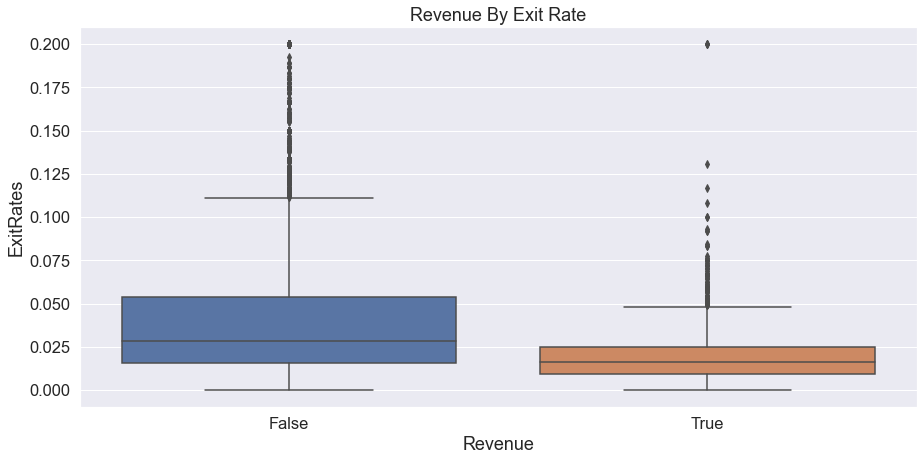

In [34]:
#Revenue By Exit Rate

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,7))

sns.boxplot(x='Revenue', y='ExitRates', data=dt).set(title='Revenue By Exit Rate')

[Text(0.5, 1.0, 'Revenue By Bounce Rate')]

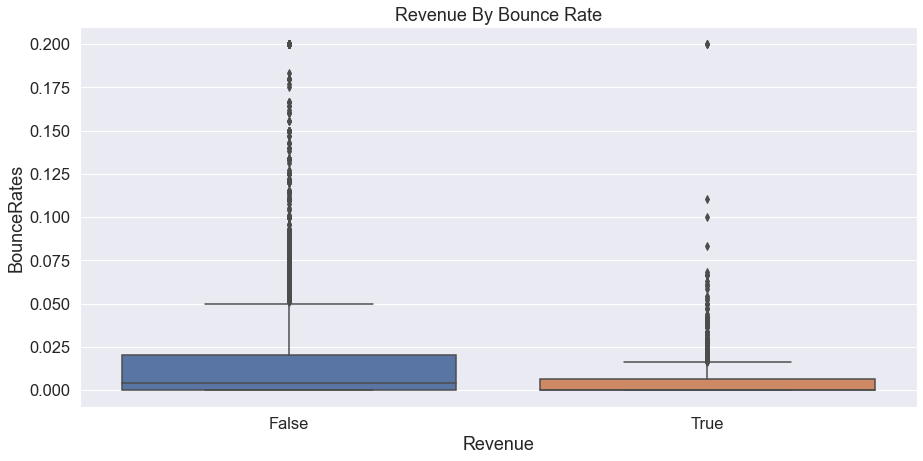

In [35]:
#Revenue By Bounce Rate

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,7))

sns.boxplot(x='Revenue', y ='BounceRates', data= dt).set(title='Revenue By Bounce Rate')

[Text(0.5, 1.0, 'Revenue By Page Values')]

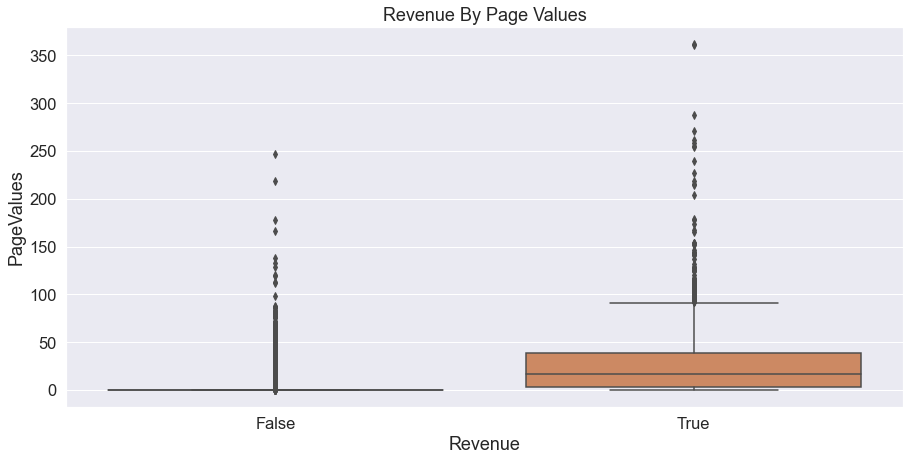

In [36]:
#Revenue By Page Values

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,7))

sns.boxplot(x='Revenue', y ='PageValues', data= dt).set(title='Revenue By Page Values')

This shows that most pages visted yield a purchase which gave a rise in the revenue generated

[Text(0.5, 1.0, 'Revenue By Bounce Rates')]

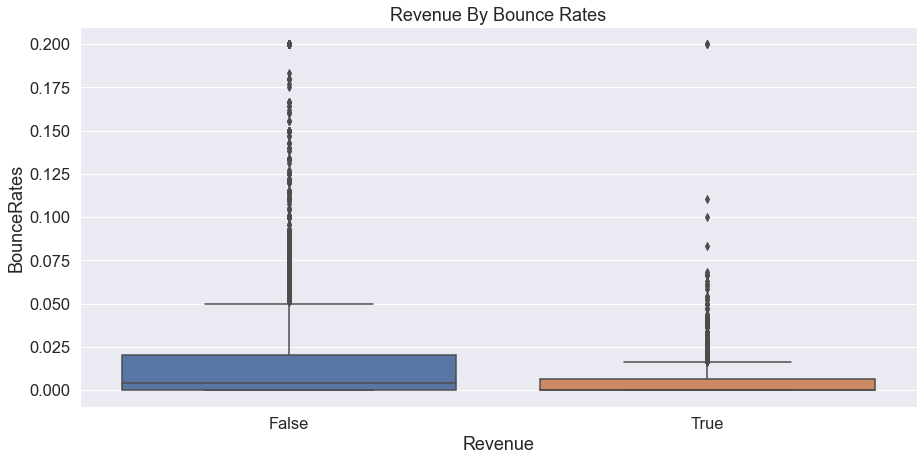

In [37]:
#Revenue By Bounce Rates

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,7))

sns.boxplot(x='Revenue', y ='BounceRates', data= dt).set(title='Revenue By Bounce Rates')

[Text(0.5, 1.0, 'Revenue By Product Related Duration')]

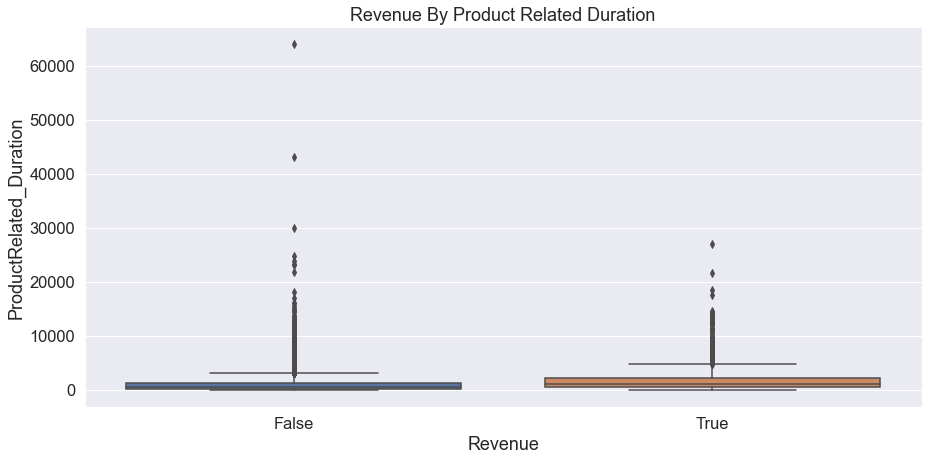

In [38]:
#Revenue By Product Related Duration

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,7))

sns.boxplot(x='Revenue', y ='ProductRelated_Duration', data= dt).set(title='Revenue By Product Related Duration')

## Multi-variant Analysis

[Text(0.5, 1.0, 'Month with Page Value Against Revenue')]

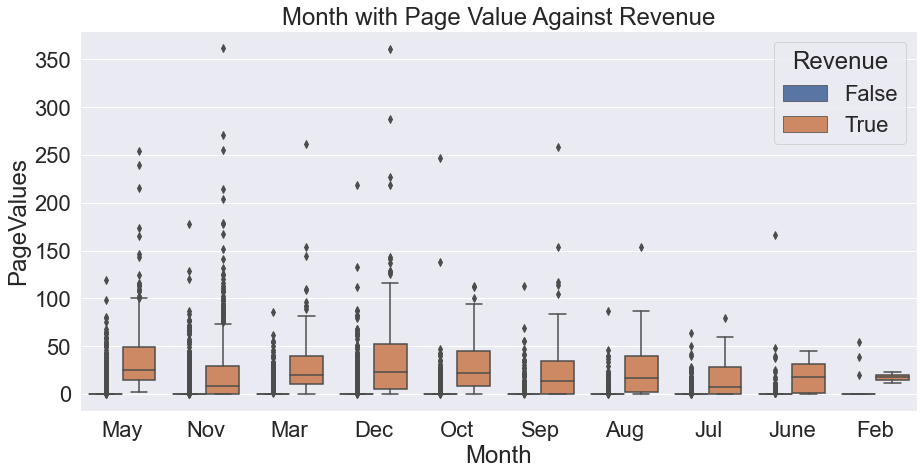

In [39]:
# Month with Page Value Against Revenue


sns.set_theme(font_scale=2)
plt.figure(figsize=(15,7))


sns.boxplot(x='Month', y='PageValues', hue='Revenue', data=dt,order = dt['Month'].value_counts(ascending=False).index ).set(title= 'Month with Page Value Against Revenue')

[Text(0.5, 1.0, 'Month with Page Value Against Revenue')]

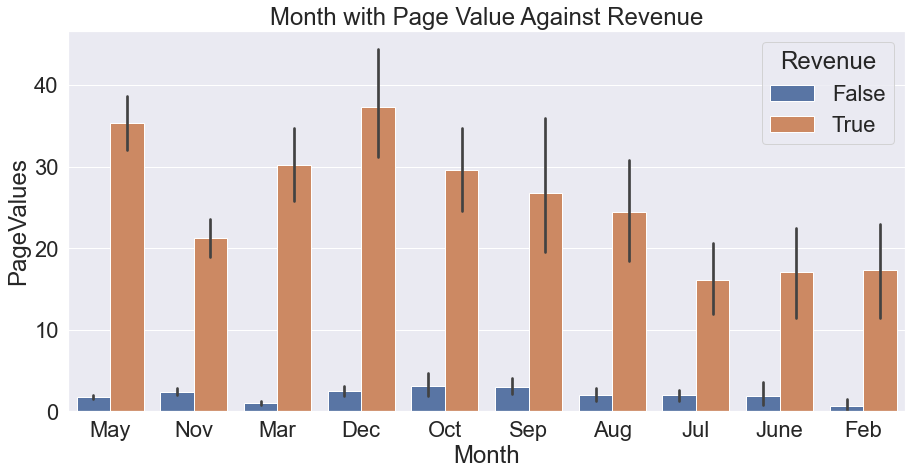

In [40]:
# Month with Page Value Against Revenue


sns.set_theme(font_scale=2)
plt.figure(figsize=(15,7))

sns.barplot(x='Month', y='PageValues', hue='Revenue', data=dt,order = dt['Month'].value_counts(ascending=False).index ).set(title= 'Month with Page Value Against Revenue')

[Text(0.5, 1.0, 'Month with Exit Rates Against Revenue')]

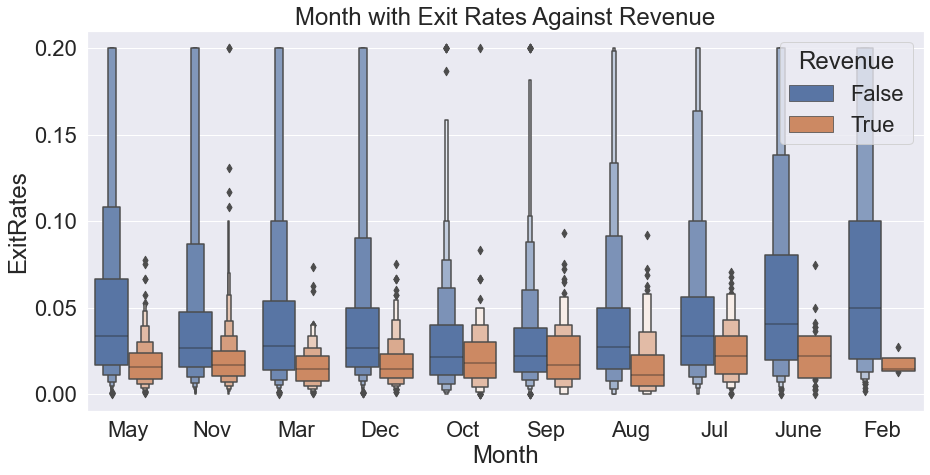

In [41]:
# Month with Exit Rate Against Revenue
sns.set_theme(font_scale=2)
plt.figure(figsize=(15,7))

plt.subplot(1, 1, 1)
sns.boxenplot(x='Month', y='ExitRates', hue='Revenue', data=dt,order = dt['Month'].value_counts(ascending=False).index ).set(title= 'Month with Exit Rates Against Revenue')

[Text(0.5, 1.0, 'Month with Exit Rates Against Revenue')]

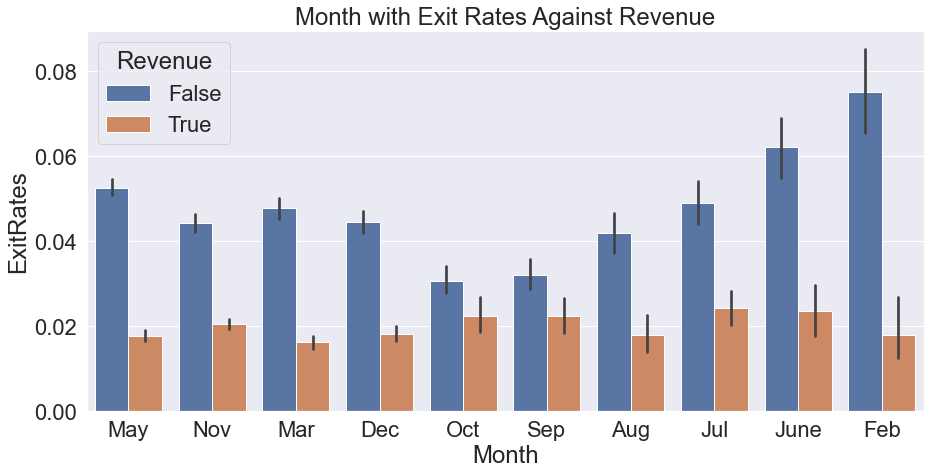

In [42]:
# Month with Exit Rate Against Revenue
sns.set_theme(font_scale=2)
plt.figure(figsize=(15,7))

plt.subplot(1, 1, 1)
sns.barplot(x='Month', y='ExitRates', hue='Revenue', data=dt,order = dt['Month'].value_counts(ascending=False).index ).set(title= 'Month with Exit Rates Against Revenue')

[Text(0.5, 1.0, 'Vistor Type with Page Value Against Revenue')]

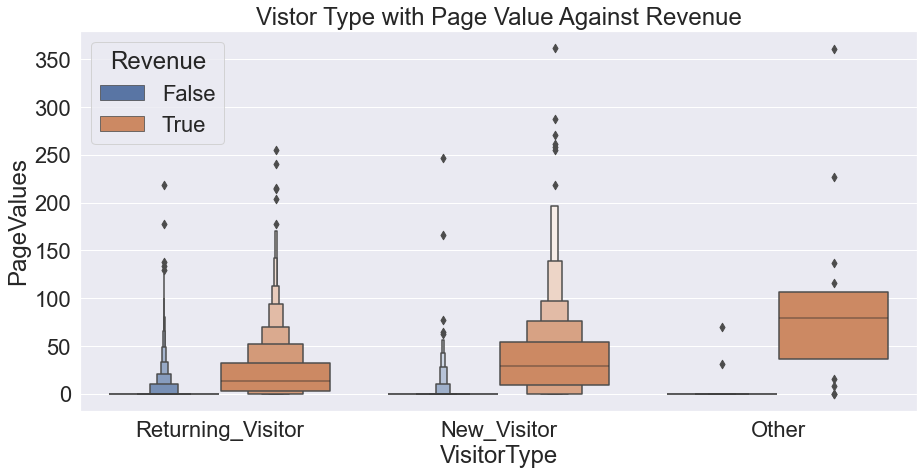

In [43]:
# Vistor Type with Page Value Against Revenue

sns.set_theme(font_scale=2)
plt.figure(figsize=(15,7))

plt.subplot(1, 1, 1)
sns.boxenplot(x='VisitorType', y='PageValues', hue='Revenue', data=dt,order = dt['VisitorType'].value_counts(ascending=False).index ).set(title= 'Vistor Type with Page Value Against Revenue')

[Text(0.5, 1.0, 'Vistor Type with Page Value Against Revenue')]

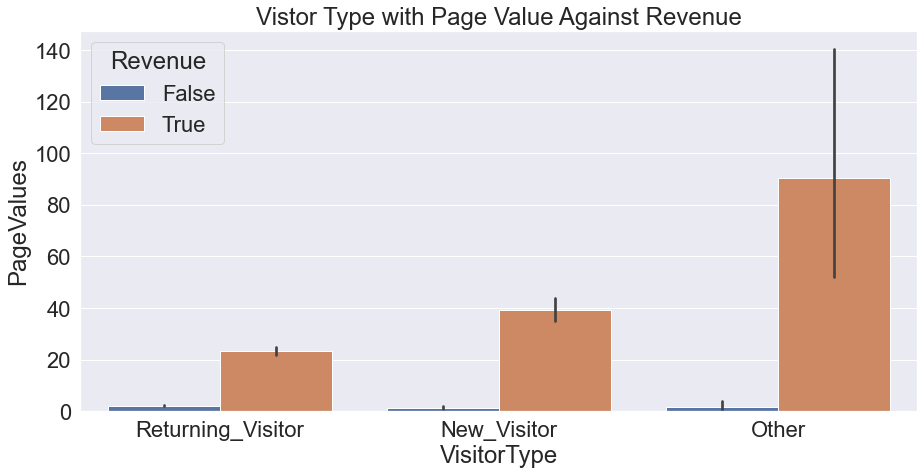

In [44]:
# Vistor Type with Page Value Against Revenue

sns.set_theme(font_scale=2)
plt.figure(figsize=(15,7))

plt.subplot(1, 1, 1)
sns.barplot(x='VisitorType', y='PageValues', hue='Revenue', data=dt,order = dt['VisitorType'].value_counts(ascending=False).index ).set(title= 'Vistor Type with Page Value Against Revenue')

## REVENUE PREDICTION

In [45]:
dt.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [46]:
  #importing libraries
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [47]:
#select categorical variables

categorical = ["Weekend","VisitorType","Month"]

#use pd.get_dummies() for one hot encoding

dt_dummies = pd.get_dummies(dt[categorical])

#view what you have done
dt_dummies.head()

,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,False,0,0,1,0,0,1,0,0,0,0,0,0,0
1,False,0,0,1,0,0,1,0,0,0,0,0,0,0
2,False,0,0,1,0,0,1,0,0,0,0,0,0,0
3,False,0,0,1,0,0,1,0,0,0,0,0,0,0
4,True,0,0,1,0,0,1,0,0,0,0,0,0,0


In [48]:
#join the encoded variables back to the main dataframe using pd.concat()

dt = pd.concat([dt,dt_dummies] ,axis=1)

print(dt.shape)
dt.head()

(12330, 32)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
#remove the initial categorical columns now that it has been encoded
#use the list called categorical do delete all the initially selected columns at once

dt = dt.drop(categorical,axis=1)

dt.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
#view the list of all columns

dt.columns



Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Revenue',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep'],
      dtype='object')

In [51]:
#select Target Your target is the column you want to predict.

y = dt['Revenue']

y.shape


(12330,)

In [52]:
X=dt.drop("Revenue", axis=1)
X.shape

(12330, 27)

In [53]:
#split into training and validation sets using a 30% split ratio

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

print('\n',X_train.head(2))
print('\n',X_test.head(2))
print('\n',y_train.head(2))
print('\n',y_test.head(2))


       Administrative  Administrative_Duration  Informational  \
9522               0                      0.0              0   
6982               4                    120.9              0   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
9522                     0.0              91              2056.106981   
6982                     0.0               7               534.000000   

      BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Aug  \
9522     0.008889   0.023937         0.0         0.0  ...          0   
6982     0.000000   0.029630         0.0         0.0  ...          1   

      Month_Dec  Month_Feb  Month_Jul  Month_June  Month_Mar  Month_May  \
9522          0          0          0           0          0          0   
6982          0          0          0           0          0          0   

      Month_Nov  Month_Oct  Month_Sep  
9522          1          0          0  
6982          0          0          0  

[2 rows x 27 columns]

In [54]:
model=LogisticRegression()
model.fit(X,y)
pre=model.predict(X_test)
score=accuracy_score(y_test,pre)
score

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8842930521762639

In [55]:
model=KNeighborsClassifier()
model.fit(X,y)
pre=model.predict(X_test)
score=accuracy_score(y_test,pre)
score

0.8961881589618816

In [56]:
model=DecisionTreeClassifier(random_state=42)
model.fit(X,y)
pre=model.predict(X_test)
score=accuracy_score(y_test,pre)
score


1.0

In [57]:
model=RandomForestClassifier(random_state=42)
model.fit(X,y)
pre=model.predict(X_test)
score=accuracy_score(y_test,pre)
score

1.0